Accuracy for k=3: 5.13%
Confusion Matrix for k=3:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 2 1 1 2 0 0 0 2 1 0 0 0 0]
 [0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 2 1 1 1 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 2 1 0 0 1 2 2 4 0 2 2 0 0 1 0 0 0]
 [0 0 0 0 2 1 1 0 1 3 2 2 0 1 0 0 1 1 0 0 1 0 0]
 [0 0 0 0 1 0 0 1 0 4 3 1 0 2 0 2 1 2 0 1 0 0 0]
 [0 0 0 0 3 0 0 0 1 4 4 0 3 1 1 1 0 1 0 1 0 0 0]
 [1 0 1 0 2 1 2 0 0 0 1 0 2 4 2 0 3 0 0 0 1 0 0]
 [0 1 0 1 0 0 1 0 1 1 1 2 1 3 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 1 2 1

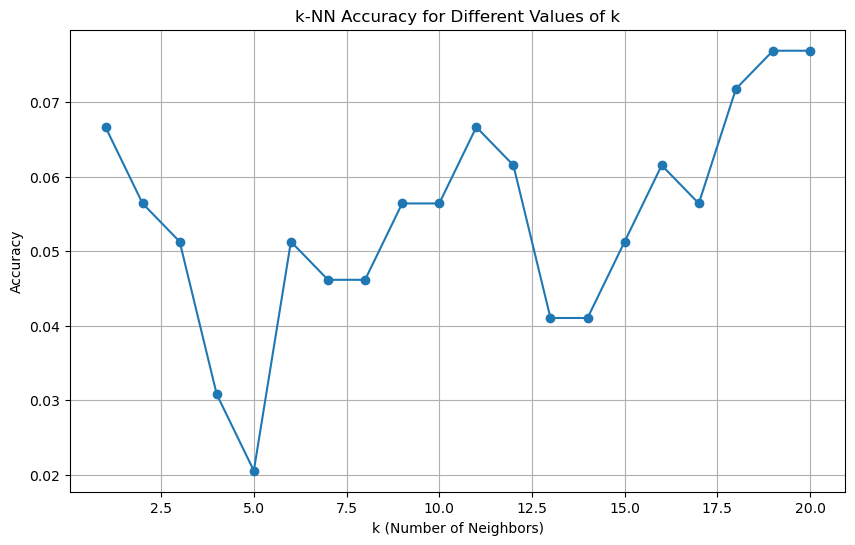

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded correctly)
iris = pd.read_excel("exam.xlsx")

# Assuming columns LOSS_LOCATION_LAT as features and MODEL_YEAR as labels
X = iris[['LOSS_LOCATION_LAT']]  # Features
y = iris['MODEL_YEAR']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train KNN classifier and return accuracy and confusion matrix
def train_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, cm

# Test with a specific value of k
k = 3
accuracy, cm = train_knn(k)

print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")
print(f"Confusion Matrix for k={k}:\n{cm}")

# Test k values from 1 to 20 and store accuracies
k_values = range(1, 21)
accuracies = []

for k in k_values:
    accuracy, _ = train_knn(k)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different Values of k')
plt.grid(True)
plt.show()
